### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r"C:\Users\ahamr\Desktop\6.1"

In [4]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'data_checked.csv'))

In [5]:
df.head(20)

,Unnamed: 0,time,latitude,longitude,depth,magnitude,number_stations_reported,gap_between_stations,root_mean_square_amplitude_spectrum,id,place,type,status
0,0,2023-01-01 00:49:25.294000+00:00,52.099900,178.521800,82.770,3.10,14.0,139.0,0.18,us7000j5a1,"Rat Islands, Aleutian Islands, Alaska",earthquake,reviewed
1,1,2023-01-01 01:41:43.755000+00:00,7.139700,126.738000,79.194,4.50,32.0,104.0,0.47,us7000j3xk,"23 km ESE of Manay, Philippines",earthquake,reviewed
2,2,2023-01-01 03:29:31.070000+00:00,19.163100,-66.525100,24.000,3.93,23.0,246.0,0.22,pr2023001000,Puerto Rico region,earthquake,reviewed
3,3,2023-01-01 04:09:32.814000+00:00,-4.780300,102.767500,63.787,4.30,17.0,187.0,0.51,us7000j3xm,"99 km SSW of Pagar Alam, Indonesia",earthquake,reviewed
4,4,2023-01-01 04:29:13.793000+00:00,53.396500,-166.941700,10.000,3.00,19.0,190.0,0.31,us7000j1zd,"59 km SSW of Unalaska, Alaska",earthquake,reviewed
5,5,2023-01-01 04:50:17.639000+00:00,19.281100,-155.428200,37.751,2.80,19.0,127.0,0.18,us7000j1c7,"10 km NNE of P?hala, Hawaii",earthquake,reviewed
6,6,2023-01-01 04:54:53.914000+00:00,-19.041900,-177.542300,556.990,4.10,15.0,87.0,0.15,us7000j3xu,Fiji region,earthquake,reviewed
7,7,2023-01-01 05:02:46.402000+00:00,-15.321900,-174.875600,255.470,4.10,40.0,81.0,0.32,us7000j3xn,Tonga,earthquake,reviewed
8,8,2023-01-01 05:18:17.780000+00:00,40.703833,-124.206167,18.470,2.70,30.0,154.0,0.14,nc73827421,"3km SSW of Humboldt Hill, CA",earthquake,reviewed
9,9,2023-01-01 05:37:05.794000+00:00,2.475200,128.638900,231.588,4.10,27.0,119.0,0.45,us7000j3xs,"108 km NE of Tobelo, Indonesia",earthquake,reviewed


In [6]:
df=df.drop(columns = ['Unnamed: 0'])

In [7]:
df.head()

,time,latitude,longitude,depth,magnitude,number_stations_reported,gap_between_stations,root_mean_square_amplitude_spectrum,id,place,type,status
0,2023-01-01 00:49:25.294000+00:00,52.0999,178.5218,82.770,3.10,14.0,139.0,0.18,us7000j5a1,"Rat Islands, Aleutian Islands, Alaska",earthquake,reviewed
1,2023-01-01 01:41:43.755000+00:00,7.1397,126.7380,79.194,4.50,32.0,104.0,0.47,us7000j3xk,"23 km ESE of Manay, Philippines",earthquake,reviewed
2,2023-01-01 03:29:31.070000+00:00,19.1631,-66.5251,24.000,3.93,23.0,246.0,0.22,pr2023001000,Puerto Rico region,earthquake,reviewed
3,2023-01-01 04:09:32.814000+00:00,-4.7803,102.7675,63.787,4.30,17.0,187.0,0.51,us7000j3xm,"99 km SSW of Pagar Alam, Indonesia",earthquake,reviewed
4,2023-01-01 04:29:13.793000+00:00,53.3965,-166.9417,10.000,3.00,19.0,190.0,0.31,us7000j1zd,"59 km SSW of Unalaska, Alaska",earthquake,reviewed


In [8]:
df.shape

(24682, 12)

### 2. Data cleaning

In [19]:
# Check for missing values

df.isnull().sum()

time                                      0
latitude                                  0
longitude                                 0
depth                                     0
magnitude                                 0
number_stations_reported               1409
gap_between_stations                   1411
root_mean_square_amplitude_spectrum       0
id                                        0
place                                  1466
type                                      0
status                                    0
dtype: int64

In [21]:
# Creating a df without Nan values in needed column for regression
df_clean = df[df['gap_between_stations'].isnull() == False]

In [22]:
df_clean.isnull().sum()

time                                      0
latitude                                  0
longitude                                 0
depth                                     0
magnitude                                 0
number_stations_reported                  0
gap_between_stations                      0
root_mean_square_amplitude_spectrum       0
id                                        0
place                                  1419
type                                      0
status                                    0
dtype: int64

### 3. Data prep for regression analysis 

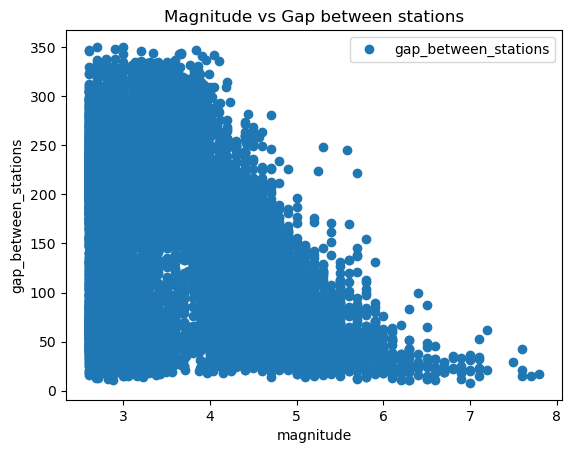

In [24]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_clean.plot(x = 'magnitude', y='gap_between_stations',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Magnitude vs Gap between stations')  
plt.xlabel('magnitude')  
plt.ylabel('gap_between_stations')  
plt.show()

#### The hypothesis is the higher the magnitude of an earthquake, the smaller the gap between seismic stations.

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_clean['magnitude'].values.reshape(-1,1)
y = df_clean['gap_between_stations'].values.reshape(-1,1)

In [26]:
X

array([[3.1 ],
       [4.5 ],
       [3.93],
       ...,
       [5.1 ],
       [4.7 ],
       [5.  ]])

In [27]:
y

array([[139.],
       [104.],
       [246.],
       ...,
       [ 54.],
       [ 61.],
       [ 64.]])

In [28]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [29]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [30]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

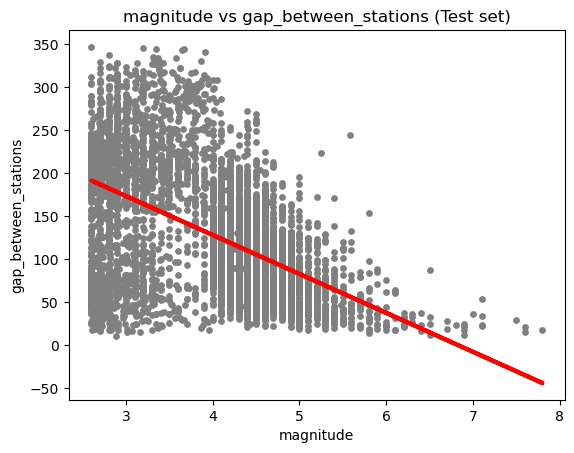

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('magnitude vs gap_between_stations (Test set)')
plot_test.xlabel('magnitude')
plot_test.ylabel('gap_between_stations')
plot_test.show()

In [35]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [36]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-45.31176382]]
Mean squared error:  3480.87857443745
R2 score:  0.2619357932575386


In [37]:
y_predicted

array([[173.37032815],
       [ 87.27797688],
       [118.99621156],
       ...,
       [ 73.68444773],
       [105.40268241],
       [158.87056372]])

In [38]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,291.0,173.370328
1,76.0,87.277977
2,170.0,118.996212
3,224.0,191.495034
4,139.0,109.933859
5,78.0,128.058564
6,126.0,186.963857
7,185.0,191.495034
8,188.0,168.839152
9,59.0,182.432681


In [39]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [40]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-45.31176382]]
Mean squared error:  3494.5718349252948
R2 score:  0.26956625268941203


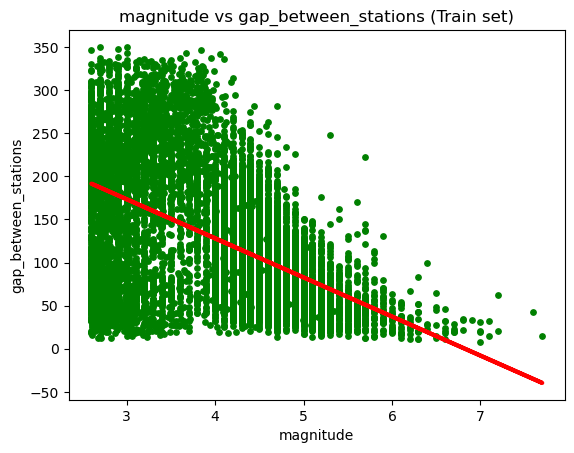

In [42]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('magnitude vs gap_between_stations (Train set)')
plot_test.xlabel('magnitude')
plot_test.ylabel('gap_between_stations')
plot_test.show()

### Results:

The MSE is large at 3480. From this, it’s safe to say that regression may not be the best model to represent this data and can’t accurately predict the influence of magnitude on the station gap.

R2 score is a number between 0 and 1, where values closer to 0 indicate a poor fit, and values closer to 1 indicate a good fit. The R2 score for our model is 0.26. We can think of this as a percentage out of one hundred, or 26 percent. This number means that the model isn’t that great of a fit either.